# Lista 2 - Cálculo 2

In [1]:
from sage.all import *

## Exercício 1

Mostre que as curvas regulares $\alpha(t) = (t, e^t), t \in \mathbb{R}$ e $\beta(s)=(log(s),s),s \in (0, \infty)$ têm o mesmo traço.

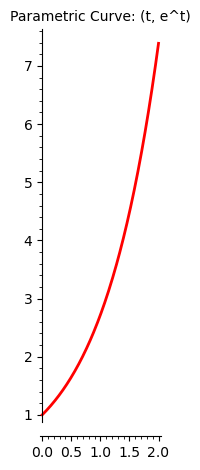

In [31]:
t = var("t")
curve = parametric_plot((t, e**t), (t, 0, 2), color="red", thickness=2, xmin=0, xmax=2, ymin=1, ymax=e**2)
curve.show(xmin=0, xmax=2, ymin=1, ymax=7.5, title="Parametric Curve: (t, e^t)")

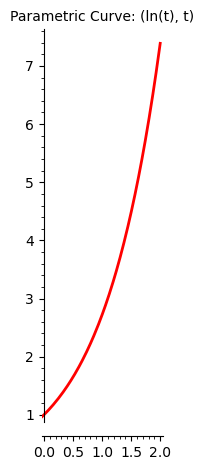

In [32]:
t = var("t")
curve = parametric_plot((log(t, e), t), (t, 0, e**2), color="red", thickness=2, xmin=0, xmax=2, ymin=1, ymax=7.5)
curve.show(xmin=0, xmax=2, ymin=1, ymax=7.5, title="Parametric Curve: (ln(t), t)")

Podemos reparametrizar $alpha$ para $beta$ usando a função $\phi(t) = ln(s)$. 

Assim $\alpha(\phi(t)) = \beta(s) = (ln(s), s)$.

Analogamente temos $\psi(s) = e^t$ tal que $\beta(\psi(s)) = \alpha(t) = (t, e^t)$

Sendo $\phi$ bijetora $((0, \infty)) \to \mathbb{R}$ e $\psi$ bijetora ($\mathbb{R} \to (0, \infty)$), deriváveis e com derivadas sempre não nulas.

Logo, possuem o mesmo traço.

## Exercício 2
Calcule o comprimento de arco das seguintes curvas:

Definição: (**Comprimento de Arco L**) O comprimento de arco de uma curva regular do ponto $\alpha(a)$ até $\alpha(b)$ é dado por:
$$ L_{a}^{b} = \int_{a}^{b} ||\alpha'(t)||dt = \int_{a}^{b} \sqrt{<\alpha'(t), \alpha'(t)>} $$

### a) $\alpha(t) = (2cosh2t, 2sinh2t, 6t), t \in [0, pi]$

In [146]:
t = var('t')
a(t) = vector([3*cosh(2*t), 3*sinh(2*t), 6*t])
a(t)

(3*cosh(2*t), 3*sinh(2*t), 6*t)

In [147]:
da = a(t).diff(t).simplify()
da

(6*sinh(2*t), 6*cosh(2*t), 6)

In [156]:
n = da.norm().simplify()
n 

6*sqrt(cosh(2*t)^2 + sinh(2*t)^2 + 1)

In [159]:
n(t) = 6 * (cosh(4*t) + 1) ** (1/2)
n(t)

6*sqrt(cosh(4*t) + 1)

In [165]:
inta(t) = n.integrate(t)
inta

t |--> 3/2*sqrt(2)*e^(2*t) - 3/2*sqrt(2)*e^(-2*t)

In [155]:
n.integrate(t, 0, pi).n()

1135.94538122686

### b) Catenária: $\gamma(t) = (t, cosh(t))$, a partir do ponto (0, 1).

In [167]:
t = var('t')
a(t) = vector([t, cosh(t)])
a(t)

(t, cosh(t))

In [168]:
da = a(t).diff(t).simplify()
da

(1, sinh(t))

In [169]:
n = da.norm().simplify()
n 

sqrt(sinh(t)^2 + 1)

In [170]:
n.integrate(t)

-1/2*e^(-t) + 1/2*e^t

In [171]:
n.integrate(t, 0, 1).n()

1.17520119364380

## Exercício 3 - Mudanças de parâmetro:

### a) Demonstrar que $s(\theta) = \frac{\theta^{2}}{\theta^{2} + 1}$ é uma mudança de parâmetro diferenciável que transforma o intervalo $(0, \infty)$ no intervalo $(0, 1)$

In [172]:
t = var('t')
s(t) = t**2/(t**2+1)
s

t |--> t^2/(t^2 + 1)

In [177]:
ds = s.diff(t)
ds

t |--> -2*t^3/(t^2 + 1)^2 + 2*t/(t^2 + 1)

In [185]:
limit(s, t=0, dir='right')

t |--> 0

In [186]:
limit(s, t=infinity)

t |--> 1

### b) Mostrar que a função $\lambda : (-1, 1) \to (-\infty, +\infty)$ definita por $\lambda(t) := tan(\pi t/2)$ é uma mudança de parâmetro.

In [189]:
t = var('t')
f = tan((pi*t)/2)

In [190]:
limit(f, t=-1, dir='right')

-Infinity

In [191]:
limit(f, t=1, dir='left')

+Infinity

### c) Provar que qualquer curva pode ser reparametrizada de forma tal que o domínio da reparametrização seja um intervalo de extremos 0 e 1.

Vamos chamar de L o cumprimento de uma curva regular $\alpha: [a, b] \to \mathbb{R}$. \\
$$ L = \int_{a}^{b} ||\alpha'(t)|| dt $$
Vamos criar uma função de reparametrização $\phi$ de modo que $\phi(t)$ mede a proporção de comprimento percorrido de $[a, t]$, com $a \leq t \leq b$. 
$$ \phi(t) = \frac{1}{L} \int_{a}^{t} ||\alpha'(t)|| dt $$
A funçao $\phi$ é diferenciável porque é a integral de funções contínuas, $\phi(0) = 0$ e $\phi(b) = 1$ logo $\phi$ leva o intervalo $[a, b]$ para $[0, 1]$.

## Exercício 4 - Provar que a curva $$ \gamma(t) = (2t, \frac{2}{1+t^2}) $$ com $t > 0$ é regular e é uma reparametrização de $$ \alpha(t) = (\frac{2cos(t)}{1+sin(t)}, 1+sin(t)), \hspace{1cm} t \in (-\pi/2, \pi/2)$$

In [193]:
t = var('t')
f(t) = vector([2*t, 2/(1+t**2)])
f

t |--> (2*t, 2/(t^2 + 1))

In [232]:
df = f.diff(t)
df

t |--> (2, -4*t/(t^2 + 1)^2)

In [236]:
solve([df[0] == 0, df[1] == 0], t)

[]

$$ \alpha(t) = (\frac{2cos(t)}{1+sin(t)}, 1+sin(t)), \hspace{1cm} t \in (-\pi/2, \pi/2)$$

Vamos supor que existe $ f(t) : \mathbb{R}_{+}^{*} \to [-\pi/2, \pi/2] $ de modo que:

$$ \frac{2cos(f(t))}{1+sin(f(t))} = 2t \hspace{2cm} \land \hspace{2cm} 1+sin(f(t)) = \frac{2}{1+t^2} $$

$$ \Rightarrow 1+sin(f(t)) = \frac{2}{1+t^2} \Rightarrow sin(f(t)) = \frac{2}{1+t^2} - \frac{1+t^2}{1+t^2} \Rightarrow sin(f(t)) = \frac{1-t^2}{1+t^2} $$

$$ \Rightarrow \frac{2cos(f(t))}{1+sin(f(t))} = 2t \Rightarrow \frac{2cos(f(t))}{\frac{2}{1+t^2}} = 2t \Rightarrow cos(f(t)) = \frac{2t}{1+t^2} $$

Podemos confirmar os valores encontrados usando a identidade trigonométrica:

$$ sin^2(f(t)) + cos^2(f(t)) = 1 \Rightarrow \frac{(1-t^2)^2}{(1+t^2)^2} + \frac{(2t)^2}{(1+t^2)^2} = \frac{1-2t^2+t^4+4t^2}{1+2t^2+t^4} = \frac{1+2t^2+t^4}{1+2t^2+t^4} = 1 \hspace{1cm} \square $$

Logo

$$ f(t) = arcsin(\frac{1-t^2}{1+t^2}) \hspace{2cm} ou \hspace{2cm} f(t) = arccos(\frac{2t}{1+t^2})

In [242]:
f(t) = arcsin((1-t^2)/(1+t^2))

In [275]:
limit(f, t=0)

t |--> 1/2*pi

In [283]:
limit(f, t=infinity)

t |--> -1/2*pi

In [284]:
arcsin(-1)

-1/2*pi

In [285]:
arcsin(1)

1/2*pi

A função arcsin está definida apenas para [-1, 1].

In [286]:
g(t) = (1-t^2)/(1+t^2)

In [289]:
limit(g, t=0)

t |--> 1

In [288]:
limit(g, t=infinity)

t |--> -1

# Lista 1 - Calculo 2

In [65]:
def print_integral(x, f, a, b):
    print(f"∫ f(x) dx = {f.integrate(x, a, b)} + C")

In [69]:
f = vector([arcsin(t), arccos(t)])
print_differentiations(t, f)

f^1(x) = (1/sqrt(-t^2 + 1), -1/sqrt(-t^2 + 1))
f^2(x) = (t/(-t^2 + 1)^(3/2), -t/(-t^2 + 1)^(3/2))


### 1.4 $F(t) = (2e^ti + 3e^tj)$

In [70]:
j = var('j')
i = var('i')
f = vector([2*e**t*i+3*e**t*j])
print_differentiations(t, f)

f^1(x) = (2*i*e^t + 3*j*e^t)
f^2(x) = (2*i*e^t + 3*j*e^t)


### 1.5 $F(t) = (cosh(t)i + sinh(2t)j+e^{-3t}k)$

In [71]:
i = var('i')
j = var('j')
k = var('k')
f = vector([cosh(t)*i + sinh(2*t)*j + e**(-3*t)*k])
print_differentiations(t, f)

f^1(x) = (2*j*cosh(2*t) - 3*k*e^(-3*t) + i*sinh(t))
f^2(x) = (i*cosh(t) + 9*k*e^(-3*t) + 4*j*sinh(2*t))


### 1.6 $F(t) = log(1+t^2)i + arctan(t)j + \frac{1}{1+t^2}k$

In [72]:
i = var('i')
j = var('j')
k = var('k')
f = vector([log(1+t**2)*i + arctan(t)*j + k/(1+t**2)])
print_differentiations(t, f)

f^1(x) = (2*i*t/(t^2 + 1) + j/(t^2 + 1) - 2*k*t/(t^2 + 1)^2)
f^2(x) = (-4*i*t^2/(t^2 + 1)^2 + 2*i/(t^2 + 1) - 2*j*t/(t^2 + 1)^2 + 8*k*t^2/(t^2 + 1)^3 - 2*k/(t^2 + 1)^2)


### 1.7 Let F be the vector-valued function given by $$F(t) = \frac{2t}{1+t^2}i + \frac{1-t^2}{1+t^2}j + k$$ Prove that the angle between $F(t)$ and $F'(t)$ is constant, that is, independent of t.

In [73]:
i = var('i')
j = var('j')
k = var('k')
t = var('t')

In [74]:
f = (2*t)/(1+t**2)*i + (1-t**2)/(1+t**2)*j + k
print_differentiations(x=t, f=f, n=1)

f^1(x) = -2*j*t/(t^2 + 1) + 2*(t^2 - 1)*j*t/(t^2 + 1)^2 - 4*i*t^2/(t^2 + 1)^2 + 2*i/(t^2 + 1)


### Compute the vector-valued integrals

#### $\int_{0}^{1} (t, \sqrt{t}, e^t)dt$

In [75]:
t = var('t')
f = vector([t, t**(1/2), e^t])
print_integral(t, f, 0, 1)

∫ f(x) dx = (1/2, 2/3, e - 1) + C


#### $\int_{0}^{1} (sin(t), cos(t), tan(t))dt$

In [76]:
t = var('t')
f = vector([sin(t), cos(t), tan(t)])
print_integral(t, f, 0, pi/4)

∫ f(x) dx = (-1/2*sqrt(2) + 1, 1/2*sqrt(2), 1/2*log(2)) + C


#### $\int_{0}^{1} (\frac{e^t}{1+e^t}\textbf{i} + \frac{1}{1+e^t}\textbf{j})dt$

In [77]:
t = var('t')
i = var('i')
j = var('j')
f = vector([e^t/(1+e^t)*i + 1/(1+e^t)*j])
print_integral(t, f, 0, 1)

∫ f(x) dx = (j*(log(2) - log(e + 1) + 1) - i*(log(2) - log(e + 1))) + C


In [78]:
f = vector([e^t/(1+e^t), 1/(1+e^t)])
print_integral(t, f, 0, 1)

∫ f(x) dx = (-log(2) + log(e + 1), log(2) - log(e + 1) + 1) + C


#### $\int_{0}^{1} (te^t\textbf{i} + t^2e^t\textbf{j} + te^{-t}k)dt$

In [79]:
f = vector([t*e^t, t^2*e^t, t*e^(-t)])
print_integral(t, f, 0, 1)

∫ f(x) dx = (1, e - 2, -2*e^(-1) + 1) + C


## Exercício 2 - Encontrar uma curva parametrizada $\alpha(t) : t \in I \to \mathbb{R}^2$; cujo traço seja o círculo $x^2 + y^2 = 1$; de maneira que t percorra o círculo no sentido anti-horário e tenhamos $\alpha(0) = (0, 1)$. Faça o desenho em um sistema CAS, incluindo a animação do vetor tangente percorrendo a curva.

Originalmente podemos pensar no traço de círculo clássico: $\gamma(t) = (cos(t), sen(t))$

Animation with 99 frames
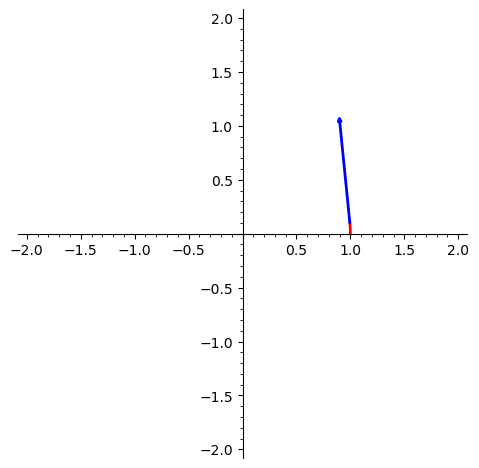

In [80]:
pplots = []
for k in srange(0.1, 10, 0.1):
    # Parametric curve
    curve = parametric_plot((cos(t), sin(t)), (t, 0, k), color="red", thickness=2, xmin=-3, xmax=3, ymin=-3, ymax=3)

    # Point and tangent vector at t = k
    P = (cos(k), sin(k))
    V = (-sin(k), cos(k))   # derivative of (cos, sin)

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=1, color="blue")

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='equal', xmin=-2, xmax=2, ymin=-2, ymax=2)
a.show()

Porém queremos que $\gamma(0) = (0,1)$ e que nosso vetor esteja no sentido anti-horario.  

Então podemos usar a função de reparametrização $\phi(t)$ tal que $cos(\phi(t)) = -sin(t)$ e $sin(\phi(t)) = cos(t)$  
  
Sabemos que $cos(a + b) = cos(a)cos(b) - sin(a)sin(b)$   
e que $sin(a+b) = cos(a)sin(b) + cos(b)sin(a)$.  

Portanto, para:  
$cos(a+b) = cos(a)cos(b) - sin(a)sin(b) = -sin(t)$, $a = t$ e $b = \pi/2$  
  
e para:
$sin(a+b) = cos(a)sin(b) + cos(b)sin(a) = cos(t)$, $a = t$ e $b = \pi/2$

Logo temos $\phi(t) = (t + \pi/2)$ e $\gamma(\phi(t)) = (-sin(t), cos(t))$

In [81]:
t = var('t')
f = vector([-sin(t), cos(t)])
f

(-sin(t), cos(t))

Animation with 99 frames
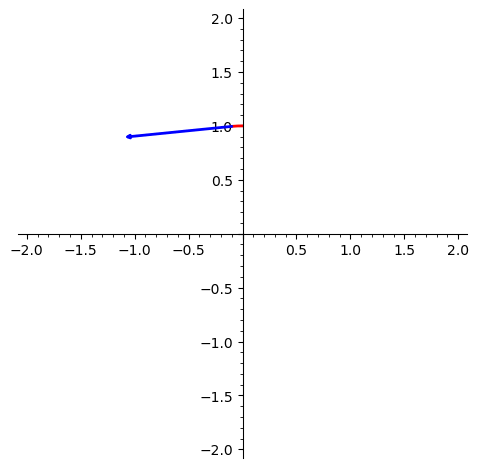

In [82]:
pplots = []
for k in srange(0.1, 10, 0.1):
    # Parametric curve
    curve = parametric_plot((-sin(t), cos(t)), (t, 0, k), color="red", thickness=2, xmin=-3, xmax=3, ymin=-3, ymax=3)

    # Point and tangent vector at t = k
    P = (-sin(k), cos(k))
    V = (-cos(k), -sin(k))   # derivative of (-sin, cos)

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=1, color="blue")

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='equal', xmin=-2, xmax=2, ymin=-2, ymax=2)
a.save("circle.gif")
a.show()

## Exercício 3 - A _limaçon_ (ou caracol de Pascal) é a curva parametrizada $$\gamma(t) = ((1+2cos(t)) \cdot cos(t); (1+2cos(t)) \cdot sin(t)); t \in \mathbb{R}$$ Faça o desenho desta curva em um sistema CAS. Observe que o ponto (0, 0) pertence ao traço da curva, e ache o vetor tangente nesse ponto.

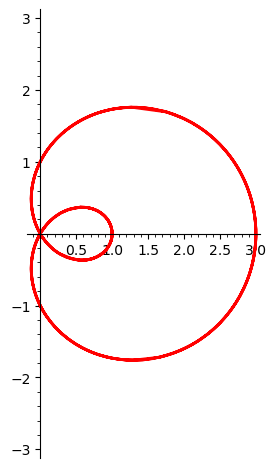

In [83]:
t = var('t')
f(t) = vector([(1+2*cos(t))*cos(t), (1+2*cos(t))*sin(t)])

curve = parametric_plot(f, (t, -10, 10), color="red", thickness=2, xmin=-3, xmax=3, ymin=-3, ymax=3)
curve

In [84]:
solve((1 + 2*cos(t))*cos(t) == 0, t)

[t == 2/3*pi, t == 1/2*pi]

In [85]:
solve((1+2*cos(t))*sin(t) == 0, t)

[t == 0, t == 2/3*pi]

In [86]:
f(2/3*pi)

(0, 0)

In [87]:
sin(2/3*pi)

1/2*sqrt(3)

## Exercício 4 - A _Cissoide de Diocles_ é a curva definida implicitamente pela equação $$x^3+xy^2-2ay^2=0$$ Encontre uma parametrização para esta curva. Faça o desenho em um sistema CAS, incluindo a animação do vetor tangente percorrendo a curva. Busque informação para entender qual o fenomeno modelado por esta curva que a tornou famosa. (Dica: use $y = xt$ para encontrar uma a parametrização da curva.)

Usando y = xt, temos:
$$ x^3 + x^2t^2 - 2ax^2t^2 = 0 $$
para $x \neq 0, temos:$
$$ \frac{x^3 + x^2t^2 - 2ax^2t^2}{x^2} = \frac{0}{x^2} $$
$$ x = 2at^2 - t^2 $$
$$ y = 2at^3 - t^3 $$
Então temos:
$$\gamma(t) = (2at^2 - t^2, 2at^3 - t^3)$$

Animation with 80 frames
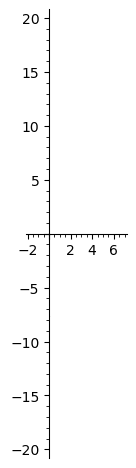

In [88]:
pplots = []
t = var('t')
a = Integer(2)
f(t) = ((2*a*t^2)/(1+t^2), (2*a*t^3)/(1+t^2))

for k in srange(-20, 20, 0.5):
    # Parametric curve
    curve = parametric_plot(f, (t, -20.1, k), color="red", thickness=2)

    # Point and tangent vector at t = k
    P = f(k)
    g(t) = f(t).derivative(t)
    V = g(k)  # derivative of f at t = k

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=g(k).norm(), color="blue")

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='equal', xmin=-2, xmax=7, ymin=-20, ymax=20)
a.show()

## Exercício 5 - o _Folium de Descartes_ é definido implicitamente pela equação $$x^3+y^3 = 3xy$$ Encontre uma parametrização para esta curva. Faça o desenho em um sistema CAS, incluindo a animação do vetor tangente percorrendo a curva. A descrição implicita desta curva da origem a uma familia de curvas da forma $$F_{\epsilon}(x, y) = x^3 + y^3 - 3xy - \epsilon$$

Usando $y = xt$, temos:
$$x^3+xˆ3t^3-3x^2t = 0$$
para $x \neq 0, temos:$
$$\frac{x^3+x^3t^3-3x^2t}{x^2} = \frac{0}{x^2}$$
$$x = \frac{3t}{1+t^3}$$
$$y = \frac{3t^2}{1+t^3}$$
Então temos:
$$\gamma(t) = (\frac{3t}{1+t^3}, \frac{3t^2}{1+t^3})$$

Animation with 34 frames
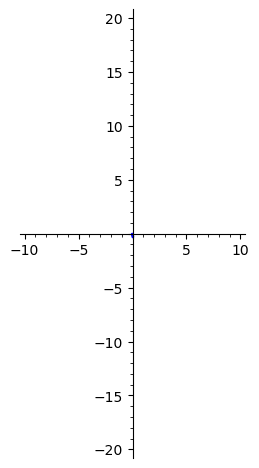

In [89]:
pplots = []
t = var('t')
f(t) = ((3*t)/(1+t^3), (3*t^2)/(1+t^3))

for k in srange(-10, 10, 0.6):
    # Parametric curve
    curve = parametric_plot(f, (t, -10.1, k), color="red", thickness=2)

    # Point and tangent vector at t = k
    P = f(k)
    g(t) = f(t).derivative(t)
    V = g(k)  # derivative of f at t = k

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=g(k).norm(), color="blue")

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='equal', xmin=-10, xmax=10, ymin=-20, ymax=20)
a.show()

## Exercício 6 - Desenhe as seguintes parametrizações da parábola $\alpha(t) = (t,t^2)$ e $\gamma(t) = (t^3,t^6)$ em ambiente computacional, utilizando sistemas de computação simbólica. Inclua a animação do vetor tangente percorrendo a curva. Mostre que $\alpha$ é curva regular e $\gamma$ não é regular. **Desafio**: Qual seria a função naturalmente candidata a ser uma reparametrização entre as duas parametrizações? Porque falha?

Animation with 34 frames
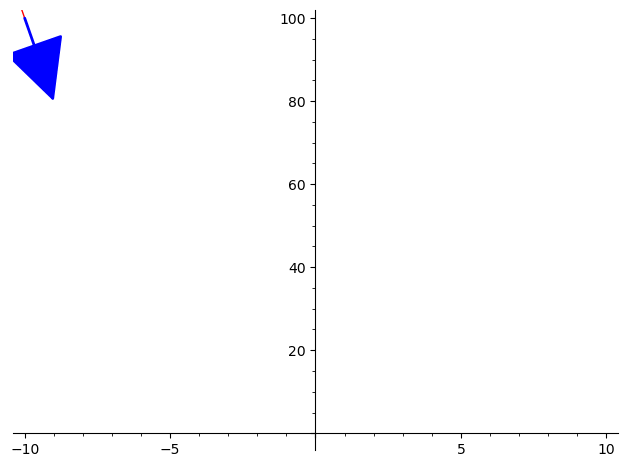

In [90]:
pplots = []
t = var('t')
f(t) = (t, t^2)

for k in srange(-10, 10, 0.6):
    # Parametric curve
    curve = parametric_plot(f, (t, -10.1, k), color="red", thickness=1)

    # Point and tangent vector at t = k
    P = f(k)
    g(t) = f(t).derivative(t)
    V = g(k)  # derivative of f at t = k

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=g(k).norm(), color="blue")

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='auto', xmin=-10, xmax=10, ymin=-2, ymax=100)
a.show()

In [91]:
f(t) = (t, t^2)
f(t).derivative(t)

(1, 2*t)

$\alpha'(t) = (1, 2t)$, logo $\alpha'(t) \neq 0$ para qualquer valor de $t$, portanto $\alpha$ é regular. \\

Animation with 40 frames
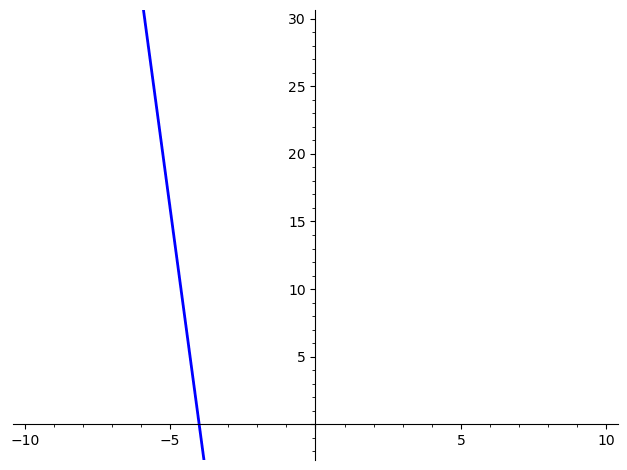

In [92]:
pplots = []
t = var('t')
f(t) = (t^3, t^6)

for k in srange(-2, 2, 0.1):
    # Parametric curve
    curve = parametric_plot(f, (t, -2.1, k), color="red", thickness=1)

    # Point and tangent vector at t = k
    P = f(k)
    g(t) = f(t).derivative(t)
    V = g(k)  # derivative of f at t = k

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=g(k).norm(), color="blue")

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='auto', xmin=-10, xmax=10, ymin=-2, ymax=30)
a.show()

In [93]:
f(t) = (t^3, t^6)
f(t).derivative(t)

(3*t^2, 6*t^5)

$\gamma'(t) = (3t^2, 6t^5)$, logo $\gamma'(t=0) = 0$, ou seja, não é regular.

## Exercício 7 - Escolha uma curva "famosa" de sua preferência, desenhe uma animação da curva e seus vetores tangentes para uma dada parametrização e discuta a conveniência de uma nova parametrização ao avaliar a maneira como a trajetória está sendo percorrida. Referência na web de curvas famosas: [https://mathshistory.st-andrews.ac.uk/Curves/](https://mathshistory.st-andrews.ac.uk/Curves/)

In [94]:
leminiscata(t) = (cos(t)/(1+sin(t)^2),(sin(t)*cos(t))/(1+sin(t)^2))

Animation with 200 frames
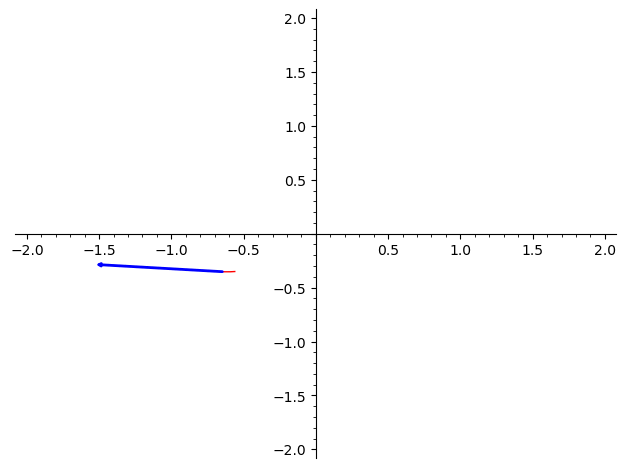

In [95]:
pplots = []
t = var('t')
f(t) = leminiscata(t)

for k in srange(-10, 10, 0.1):
    # Parametric curve
    curve = parametric_plot(f, (t, -10.1, k), color="red", thickness=1)

    # Point and tangent vector at t = k
    P = f(k)
    g(t) = f(t).derivative(t)
    V = g(k)  # derivative of f at t = k

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=g(k).norm(), color="blue")

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='auto', xmin=-2, xmax=2, ymin=-2, ymax=2)
a.show()

## Exercício 10 - Considere a espiral logaritmica $\gamma : \mathbb{R} \to \mathbb{R}^2$ definida por $\gamma(t) = (e^t \cdot cos(t), e^t \cdot sin(t))$. Desenhe a curva em ambiente computacional e mostre o ângulo entre $\gamma(t)$ e o vetor tangente em $\gamma(t)$ não depende de t.

Animation with 70 frames
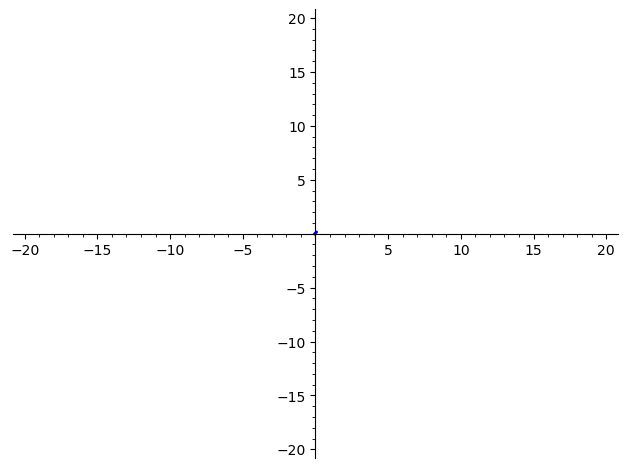

In [96]:
pplots = []
t = var('t')
f(t) = (e^t*cos(t), e^t*sin(t))

for k in srange(-3, 4, 0.1):
    # Parametric curve
    curve = parametric_plot(f, (t, -3.1, k), color="red", thickness=2)

    # Point and tangent vector at t = k
    P = f(k)
    g(t) = f(t).derivative(t)
    V = g(k)  # derivative of f at t = k

    tangent = arrow(P, (P[0]+V[0], P[1]+V[1]), arrowsize=g(k).norm(), color="blue", thickness=0.1)

    pplots.append(curve + tangent)

a = animate(pplots, aspect_ratio='auto', xmin=-20, xmax=20, ymin=-20, ymax=20)
a.show()